In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import pandas_profiling as pp
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('datasets/data.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

In [4]:
pp.ProfileReport(data)

/home/yash/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  correlation_name=correlation_name, error=error


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 27 columns):
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              30697 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                30697 non-null object
shot_id_number           30697 non-null int64
lat/lng                  30697 non-null object
type_of_shot             15416 non-nu

#### Filling the Missing values of the column 

In [4]:
def clean(x):
    x = str(x)
    x = x.replace("shot - ","")
    return x

In [5]:
def resample(x):
    if x>5 and x<=10:
        x = 0
    elif x>10 and x<=20:
        x = 1
    elif x>20 and x<=30:
        x = 2
    elif x>30 and x<=40:
        x = 3
    elif x>40 and x<=50:
        x = 4
    elif x>50 and x<=60:
        x = 5
    return x

In [6]:
data['type_of_shot'] = data['type_of_shot'].apply(clean)
data['type_of_combined_shot'] = data['type_of_combined_shot'].apply(clean)

In [7]:
data['type_of_shot'] = data['type_of_shot'].astype(np.float64)
data['type_of_combined_shot'] = data['type_of_combined_shot'].astype(np.float64)

In [8]:
data['type_of_shot'].fillna(0,inplace=True)
data['type_of_combined_shot'].fillna(0,inplace=True)

In [9]:
data['type_of_shot'] = data['type_of_shot']+data['type_of_combined_shot']

In [10]:
data['type_of_shot'] = data['type_of_shot'].astype(np.int64)

In [11]:
data['type_of_shot'] = data['type_of_shot'].apply(resample)

#### Filling the Missing values of the column (remaining_min, power_of_shot, knockout_match, remaining_sec, distance_of_shot)  

In [12]:
data['remaining_min.1'] = data['remaining_min.1'].apply(np.ceil)
data['power_of_shot.1'] = data['power_of_shot.1'].apply(np.ceil)
data['knockout_match.1'] = data['knockout_match.1'].apply(np.ceil)
data['remaining_sec.1'] = data['remaining_sec.1'].apply(np.ceil)
data['distance_of_shot.1'] = data['distance_of_shot.1'].apply(np.ceil)

In [13]:
def distance_of_shot_roundoff(x):
    if x>99:
        x = 0
    return x

In [14]:
def power_of_shot_roundoff(x):
    if x>7:
        x = 0
    return x

In [15]:
def remaining_min_roundoff(x):
    if x>11:
        x = 0
    return x

In [16]:
def remaining_sec_roundoff(x):
    if x>59:
        x = 0
    return x

In [17]:
def knockout_match_roundoff(x):
    if x == 0:
        x = 0
    elif x == 1:
        x = 1
    else:
        x=0
    return x

In [18]:
data['distance_of_shot.1'] = data['distance_of_shot.1'].apply(distance_of_shot_roundoff)

In [19]:
data['power_of_shot.1'] = data['power_of_shot.1'].apply(power_of_shot_roundoff)

In [20]:
data['remaining_min.1'] = data['remaining_min.1'].apply(remaining_min_roundoff)

In [21]:
data['remaining_sec.1'] = data['remaining_sec.1'].apply(remaining_sec_roundoff)

In [22]:
data['knockout_match.1'] = data['knockout_match.1'].apply(knockout_match_roundoff)

In [23]:
distance_of_shot_index = data['distance_of_shot'].index[data['distance_of_shot'].apply(np.isnan)]
root_distance = data['distance_of_shot.1'].iloc[distance_of_shot_index]
data['distance_of_shot'].loc[distance_of_shot_index]=root_distance

/home/yash/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
power_of_shot_index = data['power_of_shot'].index[data['power_of_shot'].apply(np.isnan)]
root_power = data['power_of_shot.1'].iloc[power_of_shot_index]
data['power_of_shot'].loc[power_of_shot_index]=root_power

In [25]:
remaining_min_index = data['remaining_min'].index[data['remaining_min'].apply(np.isnan)]
root = data['remaining_min.1'].iloc[remaining_min_index]
data['remaining_min'].loc[remaining_min_index]=root

In [26]:
remaining_sec_index = data['remaining_sec'].index[data['remaining_sec'].apply(np.isnan)]
root = data['remaining_sec.1'].iloc[remaining_sec_index]
data['remaining_sec'].loc[remaining_sec_index]=root

In [27]:
knockout_index = data['knockout_match'].index[data['knockout_match'].apply(np.isnan)]
root = data['knockout_match.1'].iloc[knockout_index]
data['knockout_match'].loc[knockout_index]=root

In [28]:
data.drop(['type_of_combined_shot','team_name','team_id','remaining_min.1','power_of_shot.1','knockout_match.1','remaining_sec.1','distance_of_shot.1','date_of_game'],axis=1,inplace=True)

In [29]:
data.to_csv('datasets/data_filled.csv',index=False)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 18 columns):
match_event_id      29134 non-null float64
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       30616 non-null float64
power_of_shot       30627 non-null float64
knockout_match      30697 non-null float64
game_season         30697 non-null object
remaining_sec       30620 non-null float64
distance_of_shot    30600 non-null float64
is_goal             24429 non-null float64
area_of_shot        29195 non-null object
shot_basics         29122 non-null object
range_of_shot       29133 non-null object
home/away           30697 non-null object
shot_id_number      30697 non-null int64
lat/lng             30697 non-null object
type_of_shot        30697 non-null int64
match_id            30697 non-null int64
dtypes: float64(9), int64(3), object(6)
memory usage: 4.2+ MB


In [31]:
pp.ProfileReport(data)

#### Dividing data sets into train and test

In [32]:
train = data[data['is_goal'].isnull()!=True]

In [33]:
test = pd.merge(data,sample_submission, on=['shot_id_number'], how='inner')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 19 columns):
match_event_id      4728 non-null float64
location_x          4753 non-null float64
location_y          4762 non-null float64
remaining_min       4990 non-null float64
power_of_shot       4988 non-null float64
knockout_match      5000 non-null float64
game_season         5000 non-null object
remaining_sec       4985 non-null float64
distance_of_shot    4985 non-null float64
is_goal_x           0 non-null float64
area_of_shot        4741 non-null object
shot_basics         4767 non-null object
range_of_shot       4746 non-null object
home/away           5000 non-null object
shot_id_number      5000 non-null int64
lat/lng             5000 non-null object
type_of_shot        5000 non-null int64
match_id            5000 non-null int64
is_goal_y           5000 non-null float64
dtypes: float64(10), int64(3), object(6)
memory usage: 781.2+ KB


In [34]:
test.drop(['is_goal_x','is_goal_y'],axis=1,inplace=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 1 to 30696
Data columns (total 18 columns):
match_event_id      23189 non-null float64
location_x          23273 non-null float64
location_y          23184 non-null float64
remaining_min       24361 non-null float64
power_of_shot       24372 non-null float64
knockout_match      24429 non-null float64
game_season         24429 non-null object
remaining_sec       24371 non-null float64
distance_of_shot    24351 non-null float64
is_goal             24429 non-null float64
area_of_shot        23247 non-null object
shot_basics         23146 non-null object
range_of_shot       23181 non-null object
home/away           24429 non-null object
shot_id_number      24429 non-null int64
lat/lng             24429 non-null object
type_of_shot        24429 non-null int64
match_id            24429 non-null int64
dtypes: float64(9), int64(3), object(6)
memory usage: 3.5+ MB


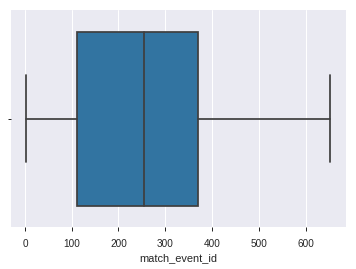

In [36]:
sns.boxplot(x="match_event_id", data=train)

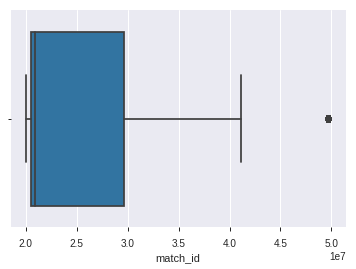

In [37]:
sns.boxplot(x="match_id",data=train)

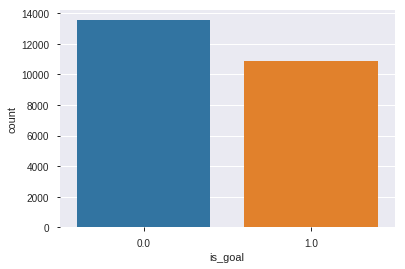

In [38]:
sns.countplot(train["is_goal"])

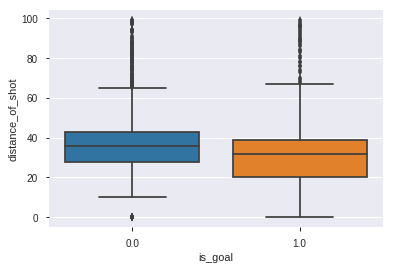

In [39]:
sns.boxplot(x="is_goal",y="distance_of_shot",data=train)

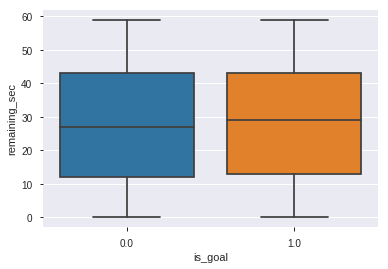

In [40]:
sns.boxplot(x="is_goal",y="remaining_sec",data=train)

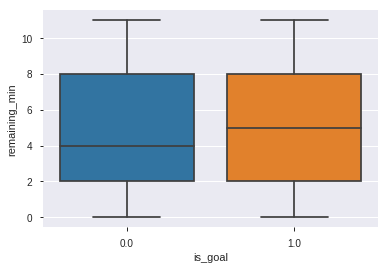

In [41]:
sns.boxplot(x="is_goal",y="remaining_min",data=train)

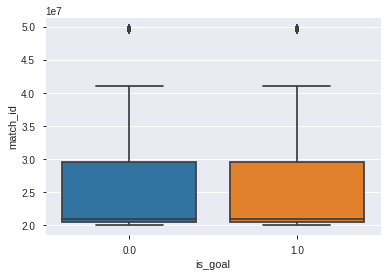

In [42]:
sns.boxplot(x="is_goal",y="match_id",data=train)

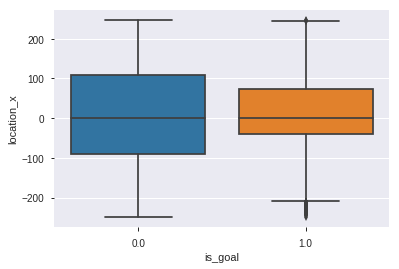

In [43]:
sns.boxplot(x="is_goal",y="location_x",data=train)

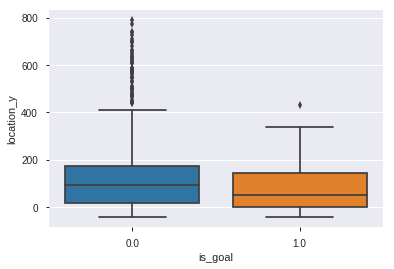

In [44]:
sns.boxplot(x="is_goal",y="location_y",data=train)

In [45]:
outlier_index = train[(train['power_of_shot'] == 7) | (train['distance_of_shot'] == 0)].index
train.drop(outlier_index,inplace = True)

/home/yash/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24402 entries, 1 to 30696
Data columns (total 18 columns):
match_event_id      23165 non-null float64
location_x          23246 non-null float64
location_y          23158 non-null float64
remaining_min       24334 non-null float64
power_of_shot       24345 non-null float64
knockout_match      24402 non-null float64
game_season         24402 non-null object
remaining_sec       24344 non-null float64
distance_of_shot    24325 non-null float64
is_goal             24402 non-null float64
area_of_shot        23222 non-null object
shot_basics         23119 non-null object
range_of_shot       23156 non-null object
home/away           24402 non-null object
shot_id_number      24402 non-null int64
lat/lng             24402 non-null object
type_of_shot        24402 non-null int64
match_id            24402 non-null int64
dtypes: float64(9), int64(3), object(6)
memory usage: 3.5+ MB


In [47]:
train.to_csv('datasets/train.csv',index=False)
test.to_csv('datasets/test.csv',index=False)